<a href="https://colab.research.google.com/github/Shaheer-khan-github/Easy-OCR/blob/main/EasyOCR_(Histogram_%2B_Patches).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Install and Import Dependencies

In [ ]:
# Install easyocr 
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 13 kB/s 
     |████████████████████████████████| 47.6 MB 1.3 MB/s 


In [ ]:
# Install Dependencies
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd

## 1. Read image or video

In [ ]:
IMAGE_PATH = '/content/OCR.jpg'

In [ ]:
# 'en' is specifying English OCR 
reader = easyocr.Reader(['en'])      
result = reader.readtext(IMAGE_PATH)
# Result shows the Coordinates, Text and Score
result

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[([[5, 5], [121, 5], [121, 21], [5, 21]], 'POWER SUPPLY', 0.682432024774032),
 ([[3, 19], [39, 19], [39, 37], [3, 37]], 'THE', 0.9625320843711866),
 ([[45, 21], [149, 21], [149, 37], [45, 37]],
  'CALCULATOR',
  0.9990978874646378),
 ([[177, 19], [283, 19], [283, 37], [177, 37]],
  'POWERED BY',
  0.940085283009527),
 ([[5, 37], [61, 37], [61, 53], [5, 53]], 'SOLAR', 0.9505057547809651),
 ([[67, 35], [109, 35], [109, 53], [67, 53]], 'CELL', 0.998600423336029),
 ([[115, 37], [151, 37], [151, 53], [115, 53]], 'AND', 0.999881896349965),
 ([[175, 37], [283, 37], [283, 53], [175, 53]],
  'BATTERY FOR',
  0.3771433694291984),
 ([[7, 51], [285, 51], [285, 69], [7, 69]],
  'BACKUP THE DISPLAY WILL DIM WHEN',
  0.7894264149755642),
 ([[7, 67], [281, 67], [281, 85], [7, 85]],
  'THE BATTERY NEEDS TO BE AEPLACED',
  0.7006266136182724),
 ([[7, 83], [39, 83], [39, 99], [7, 99]], 'THE', 0.997634704488416),
 ([[67, 81], [283, 81], [283, 99], [67, 99]],
  'SIGN OF EACH BATTERY MuST',
  0.556145744230

## 2. Write Recognized Text 

In [ ]:
# Text from an image
text = [result[res][1] for res in range(len(result))]
text

['POWER SUPPLY',
 'THE',
 'CALCULATOR',
 'POWERED BY',
 'SOLAR',
 'CELL',
 'AND',
 'BATTERY FOR',
 'BACKUP THE DISPLAY WILL DIM WHEN',
 'THE BATTERY NEEDS TO BE AEPLACED',
 'THE',
 'SIGN OF EACH BATTERY MuST',
 'SHOW UPWAAD WHEN INSERTED;']

## 3. Draw Bounding Boxes in Multiple Lines 


0 POWER SUPPLY
1 THE
2 CALCULATOR
3 POWERED BY
4 SOLAR
5 CELL
6 AND
7 BATTERY FOR
8 BACKUP THE DISPLAY WILL DIM WHEN
9 THE BATTERY NEEDS TO BE AEPLACED
10 THE
11 SIGN OF EACH BATTERY MuST
12 SHOW UPWAAD WHEN INSERTED;


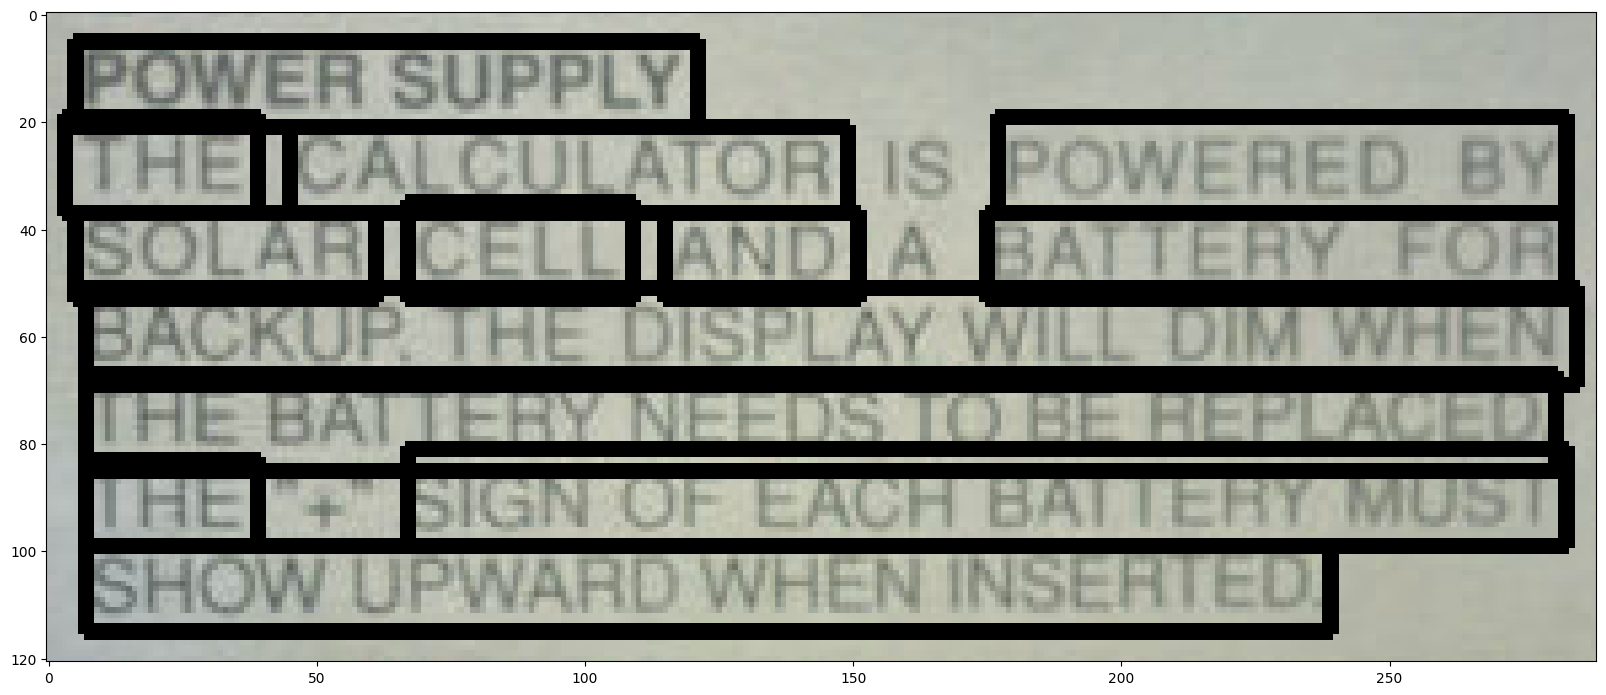

In [ ]:
img = cv2.imread(IMAGE_PATH)
# Image size with DPI
plt.figure(figsize=(20, 20), dpi=100)
i = 0
for detection in result:
  # Top left coordinate
    top_left = tuple([int (val) for val in detection[0][0]])  
  # Bottom right coordinate  
    bottom_right = tuple([int (val) for val in detection[0][2]])
  # Text extraction
    text = detection[1]
    print(str(i)+' '+text) 
  # Draw Rectangle
    img = cv2.rectangle(img,top_left,bottom_right,(0,0,0),2)    
    i+=1

plt.imshow(img)    
plt.savefig('Detected_Text.png')
plt.show()

## 4. Prediction Score Histogram

,Prediction_Score
0,0.682432
1,0.962532
2,0.999098
3,0.940085
4,0.950506


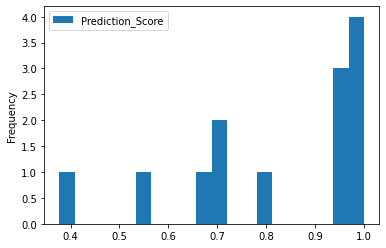

In [ ]:
data = []
for i in range(len(result)):
  # Append the prediction score in the list
  data.append([result[i][2]])
  # Create the dataframe of the prediction score
  df = pd.DataFrame(data,columns=["Prediction_Score"])

display(df.head())
df.plot.hist(bins=20)
plt.savefig("Prediction_Score.png", dpi=100)

In [ ]:
# Statistical Summary of score
df.describe()

,Prediction_Score
count,13.000000
mean,0.820904
std,0.202067
min,0.377143
25%,0.700627
50%,0.940085
75%,0.997635
max,0.999882


## 5. Write Output Text in the File

In [ ]:
textfile = open("Output.txt", "w")
# Write output text in the file 
for i in range(len(result)):
  textfile.write(str(i) +': ' + str([result[i][1]])+ "\n")    

textfile.close()

## 6. Cropping and storing Detected Bounding Boxes

In [ ]:
# Create Directory to store patches
os.mkdir ('/content/Patches')
%cd '/content/Patches'

/content/Patches


In [ ]:
for i in range(len(result)):
  X= int(result[i][0][0][0])            # //Column
  Y= int(result[i][0][0][1])            # //Row
  W= int(result[i][0][1][0])            # //Width
  H= int(result[i][0][2][1])            # //Height
# Slicing of particular boxes
  cropped_image = img[Y:Y+H, X:X+W]
# Save an image 
  cv2.imwrite(str(i)+'.png', cropped_image)

In [ ]:
# Zip the patches Folder
# /Destination /Source
!zip -r /content/Patches.zip /content/Patches    

  adding: content/Patches/ (stored 0%)
  adding: content/Patches/9.png (deflated 3%)
  adding: content/Patches/5.png (deflated 2%)
  adding: content/Patches/7.png (deflated 3%)
  adding: content/Patches/12.png (deflated 3%)
  adding: content/Patches/10.png (stored 0%)
  adding: content/Patches/4.png (deflated 1%)
  adding: content/Patches/1.png (stored 0%)
  adding: content/Patches/6.png (deflated 3%)
  adding: content/Patches/8.png (deflated 3%)
  adding: content/Patches/0.png (deflated 1%)
  adding: content/Patches/11.png (deflated 4%)
  adding: content/Patches/3.png (deflated 2%)
  adding: content/Patches/2.png (deflated 2%)


In [ ]:
# Download the patches folder 
from google.colab import files
files.download("/content/Patches.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Write dependencies for future consideration

# %cd ..
# !pip freeze > Requirements.txt

/content
